#EXPLANATION AND UPLOAD OF THE DATASET

This bloque of code is for installing three packages to work with neuroal networks and image processing.

- tfds-nightly allows to access preset datasets easely
- tensorflow is for deep learning models
- matplotlip is for graphics and images

In [ ]:
!pip install -q tfds-nightly tensorflow matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds

Here we load the dataset with a format suitable for supervised training, where each sample is a tuple (image, label), selecting 10 samples of the dataset



Heres, the dataset is again upload but with the additional atribute << with_info = True >> Which uploads the dtaset and the additional data about it, the metadata. This is the number of clases, number of samples, its size and other characteristics.

the second line creates a dataframe with the first 4 samples and visualize it as an image.

This access the metadata of the dataset uploaded stored in info.

In [ ]:
import pandas as pd
# Load dataset with access to the metadata
ds, info = tfds.load('pneumonia_mnist', with_info=True)
builder = tfds.builder('pneumonia_mnist')
info = builder.info
print(info)





tfds.core.DatasetInfo(
    name='pneumonia_mnist',
    full_name='pneumonia_mnist/1.0.0',
    description="""
    # MedMNIST Pneumonia Dataset
    
    The PneumoniaMNIST is based on a prior dataset of 5,856 pediatric chest X-Ray
    images. The task is binary-class classification of pneumonia against normal. The
    source training set is split with a ratio of 9:1 into training and validation
    set, and use its source validation set as the test set. The source images are
    gray-scale, and their sizes are (384–2,916) × (127–2,713). The images are
    center-cropped with a window size of length of the short edge and resized into 1
    × 28 × 28.
    """,
    homepage='https://medmnist.com//',
    data_dir='/root/tensorflow_datasets/pneumonia_mnist/1.0.0',
    file_format=tfrecord,
    download_size=3.98 MiB,
    dataset_size=3.66 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),

ValueError: All arrays must be of the same length

# UPLOAD AND PROCESSING OF THE DATA AND IMPLEMENTATION OF THE MODEL

INFO TRAIN
tfds.core.DatasetInfo(
    name='pneumonia_mnist',
    full_name='pneumonia_mnist/1.0.0',
    description="""
    # MedMNIST Pneumonia Dataset
    
    The PneumoniaMNIST is based on a prior dataset of 5,856 pediatric chest X-Ray
    images. The task is binary-class classification of pneumonia against normal. The
    source training set is split with a ratio of 9:1 into training and validation
    set, and use its source validation set as the test set. The source images are
    gray-scale, and their sizes are (384–2,916) × (127–2,713). The images are
    center-cropped with a window size of length of the short edge and resized into 1
    × 28 × 28.
    """,
    homepage='https://medmnist.com//',
    data_dir='/root/tensorflow_datasets/pneumonia_mnist/1.0.0',
    file_format=tfrecord,
    download_size=3.98 MiB,
    dataset_size=3.66 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_

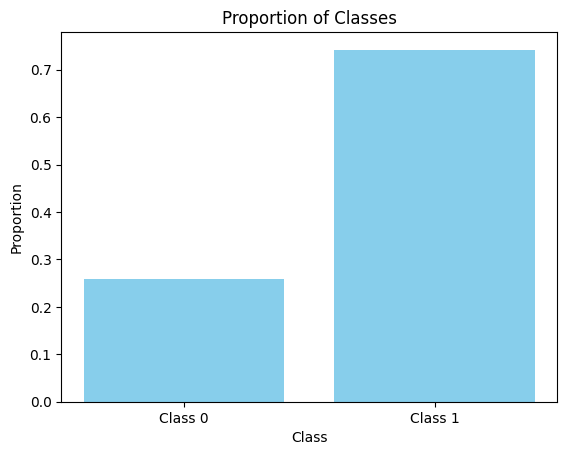

In [ ]:
!pip install -q tfds-nightly tensorflow matplotlib
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from imblearn.over_sampling import SMOTE
import pandas as pd
import matplotlib.pyplot as plt

#datset train and test

# Load training set as dataframe
ds_train, info_train = tfds.load('pneumonia_mnist', split='train', with_info=True)
ds_test, info_test = tfds.load('pneumonia_mnist', split='test', with_info=True)
#size = len(ds_train)

print("INFO TRAIN")
print(info_train)

print("*"*100)
print("INFO TEST")
print(info_test)

df_train = tfds.as_dataframe(ds_train, info_train)
df_test = tfds.as_dataframe(ds_test, info_train)
print("*"*100)
print("Number of samples of the training set", info_train.splits['train'].num_examples)
print("Number of samples of the test set", info_test.splits['test'].num_examples)
print("Balance of clases within the training")
print(df_train['label'].value_counts())
print("Balance of the clases within the training")
print(df_test['label'].value_counts())


unique_labels, counts = np.unique(np.array(df_train['label']), return_counts=True)
proportions = counts / counts.sum()

print()
# Plot a bar chart for the proportions
plt.bar(unique_labels, proportions, color='skyblue')
plt.xticks(unique_labels, ['Class 0', 'Class 1'])
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.title('Proportion of Classes')
plt.show()

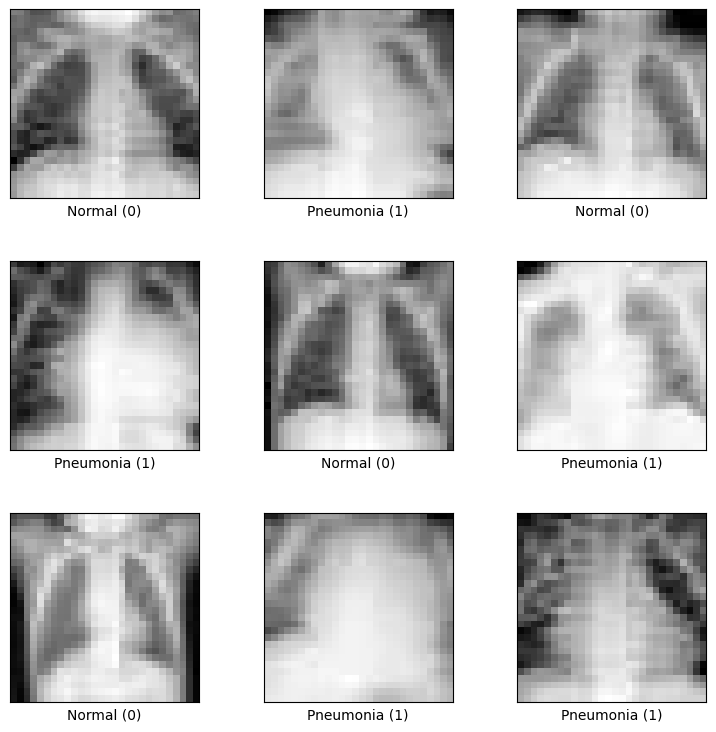

Image:  Figure(900x900)
Shape of the training set (4708,)
DATAFRAME TRAIN
                                                   image  label
0     [[[0.5529411764705883], [0.5450980392156862], ...      0
1     [[[0.21568627450980393], [0.23137254901960785]...      1
2     [[[0.07450980392156863], [0.11764705882352941]...      0
3     [[[0.2980392156862745], [0.2235294117647059], ...      1
4     [[[0.23137254901960785], [0.25882352941176473]...      0
...                                                 ...    ...
4703  [[[0.11764705882352941], [0.12156862745098039]...      1
4704  [[[0.41568627450980394], [0.43529411764705883]...      1
4705  [[[0.4], [0.3215686274509804], [0.270588235294...      0
4706  [[[0.30980392156862746], [0.34509803921568627]...      1
4707  [[[0.25098039215686274], [0.24313725490196078]...      1

[4708 rows x 2 columns]
Clases of the dataset -->  ['Normal', 'Pneumonia']
*********************************************************************************************

In [ ]:


#NORMALIZATION

image_train = df_train['image']
image_test = df_test['image']

#show
#example = ds_train.take(1)
print("Image: ", tfds.show_examples(ds_train,info_train))


print("Shape of the training set",image_train.shape)

df_train['image'] = image_train /255.0
df_test ['image'] = image_test / 255.0

print("DATAFRAME TRAIN\n", df_train)
#obtain classes of the dataset
classes = info_train.features['label'].names
print("Clases of the dataset --> ",classes)


smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train = np.array(df_train['image'].tolist())
X_train = X_train.reshape(X_train.shape[0], -1)


y_train = np.array(df_train['label'])

#np.arrays X_resampled, y_resampled
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_resampled = X_resampled.reshape(X_resampled.shape[0], 28, 28, 1)

#np.array test
X_test = np.array(df_test['image'].tolist())
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
y_test = np.array(df_test['label'].tolist())

print("*"*100)
print("SMOTE APPIED")
print( pd.Series(y_resampled).value_counts())

print("X_test", X_test)
print("*"*100)
print("Y_TEST", y_test)


Aqui deberia de leerme la explicacion de chatgpt sobre las capas y filtros utilizados Para luego en mi report, explicar la metodologia.

In [ ]:
# first neural network with keras tutorial

from tensorflow.keras import models
from tensorflow.keras import layers

#Create the CNN network (The feature extraction part)
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Display the feature extractor architecture
model.summary()

#Add the classifier part(Dense/DNN layers)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])
#fit the model
history = model.fit(X_resampled, y_resampled, epochs=25,
                    validation_data=(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,744 (217.75 KB)

 Trainable params: 55,744 (217.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 92,737 (362.25 KB)

 Trainable params: 92,737 (362.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.7809 - loss: 0.4484 - val_accuracy: 0.8670 - val_loss: 0.3567
Epoch 2/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.9441 - loss: 0.1547 - val_accuracy: 0.8878 - val_loss: 0.3382
Epoch 3/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9524 - loss: 0.1298 - val_accuracy: 0.8798 - val_loss: 0.3501
Epoch 4/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.9643 - loss: 0.0999 - val_accuracy: 0.8702 - val_loss: 0.4480
Epoch 5/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9609 - loss: 0.1026 - val_accuracy: 0.8798 - val_loss: 0.4210
Epoch 6/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9623 - loss: 0.0900 - val_accuracy: 0.8654 - val_loss: 0.4575
Epoch 7/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9709 - loss: 0.0761 - val_accuracy: 0.8990 - val_loss: 0.3334
Epoch 8/25
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9765 - loss: 0.0721 - val_a

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int)

# Calculate confusion matrix
print("CONFUSION MATRIX")
cm = confusion_matrix(y_test, y_pred_class)
print(cm)
#classification report
print("Classification Report:")
report = classification_report(y_test, y_pred_class, target_names=["Class 0", "Class 1"])
print(report)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
CONFUSION MATRIX
[[160  74]
 [  3 387]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.98      0.68      0.81       234
     Class 1       0.84      0.99      0.91       390

    accuracy                           0.88       624
   macro avg       0.91      0.84      0.86       624
weighted avg       0.89      0.88      0.87       624

